# Part II - Money talk. What moves prosper.com costumers?
## by Sven Huff



## Investigation Overview

Main goal is to provide insights for a communication strategy for prosper.com. The prosper.com audience is more wealthy and financually literate than the US average. 


## Dataset Overview
The Prosper loan dataset contains 113937 loans with 81 features on each one like "IncomeRange", "CreditGrade", and "LoanOriginalAmount" collected from the platform prosper.com. The data is splitted in a pre- and a post 2009 era for reasons I don't know.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('../data/prosperLoanData.csv')
df_clean = df.copy()
drop_cols = ['ListingKey', 'MemberKey', 'LoanNumber', 'LoanKey', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'ListingNumber', 'EmploymentStatusDuration', 'CurrentlyInGroup', 'GroupKey', 'TradesOpenedLast6Months']
for col in drop_cols:
    df_clean = df_clean.drop(col, axis = 1)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Prosper.com users are more wealthy than average

For context: The **median income of US citizens** is around 54.000 in [2022](https://www.firstrepublic.com/insights-education/how-much-does-the-average-american-make). Back in 2009, it was [nearly the same](https://www.reuters.com/article/us-usa-economy-incomes-idUSTRE77302W20110804). 
**Attention** The data is not ordered from "least" to "most". <br> The users on prosper.com seem to be **more wealthy** in terms of money than the average citizen. This is confirmed by applying the "describe" method on the StatedMonthlyIncome: mean = $ 5608.03 

($ 5608 monthly mean income is above US average. However, this is to be taken carefully, indicated by the high max value and the high standard deviation. For a more indepth survey it's recommendable to focus on the 25% - 75% quartile.)

In [3]:
#Changing the IncomeRange into categorical data and order them
ranges = ['Not displayed', 'Not employed','$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999','$100,000+']
levels = pd.api.types.CategoricalDtype(categories=ranges, ordered = True)
df_clean['IncomeRange'] = df_clean['IncomeRange'].astype(levels)

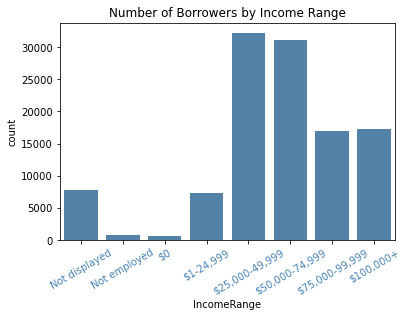

In [4]:
ax = sb.countplot(x='IncomeRange', data=df_clean, color='steelblue')
ax.set_title('Number of Borrowers by Income Range')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, color = "steelblue")
plt.show();

### What is the ratio of state inhabitents to prosper.com users?
In every state, prosper.com is only used by a tiny fracture of the population. (Far below 0.1). Prosper.com is most popular in the District of Columbia.

In [5]:
states = {
 'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'
}

def replace_states(state):
    full_name = states.get(state)
    if full_name:
        return full_name
    else:
        return state
    
df_clean['BorrowerState'] = df_clean['BorrowerState'].apply(replace_states)
# Displaying the value counts of states
state_counts = df_clean['BorrowerState'].value_counts()

inhabitants = {
    "California": 39538223,
    "Texas": 29145505,
    "Florida": 21538187,
    "New York": 20201249,
    "Pennsylvania": 13002700,
    "Illinois": 12812508,
    "Ohio": 11799448,
    "Georgia": 10711908,
    "North Carolina": 10439388,
    "Michigan": 10077331,
    "New Jersey": 9288994,
    "Virginia": 8631393,
    "Washington": 7705281,
    "Arizona": 7151502,
    "Massachusetts": 7029917,
    "Tennessee": 6910840,
    "Indiana": 6785528,
    "Maryland": 6177224,
    "Missouri": 6154913,
    'Wisconsin':5893718 ,
   'Colorado':5773714 ,
   'Minnesota':5706494 ,
   'South Carolina':5118425 ,
   'Alabama':5024279 ,
   'Louisiana':4657757 ,
   'Kentucky':4505836 ,
   'Oregon':4237256 ,
   'Oklahoma':3959353 ,
   'Connecticut':3605944 ,
   'Utah':3271616 ,
   'Iowa':3190369 ,
   'Nevada':3104614 , 
   'Arkansas':3011524 , 
   'Mississippi':2961279 , 
    'Kansas' :2937880 , 
    'New Mexico' :2117522 , 
'Nebraska' :1961504 , 
'Idaho' :1839106 , 
'West Virginia' :1793716 , 
'Hawaii' :1455271 , 
'New Hampshire' :1377529 , 
'Maine' :1362359 , 
'Montana' :1084225 , 
'Rhode Island' :1097379 , 
'Delaware' :989948 , 
'South Dakota' :886667 ,  
'North Dakota' :779094 ,  
'Alaska':733391,  
'District of Columbia':689545,  
'Vermont' :643077,  
'Wyoming':576851
}

# Create an empty dataframe 
df_state_counts = pd.DataFrame(columns=['State', 'Count'])

# Populate dataframe with values from the state_counts
df_state_counts['State'] = state_counts.index
df_state_counts['Count'] = state_counts.values

#df_state_counts = df_state_counts.reset_index(drop=True)

# Add new column 'Prop' to the dataframe
df_state_counts['Prop'] = 0.0

# Calculate proportion of each state 
for i, row in df_state_counts.iterrows():
    state = row['State']
    count = row['Count']
    prop = count / inhabitants[state]
    
    # Assign the calculated value to the 'Prop' column 
    df_state_counts.at[i, 'Prop'] = prop

Text(0.5, 1.0, 'Popularity of prosper.com per State related to population')

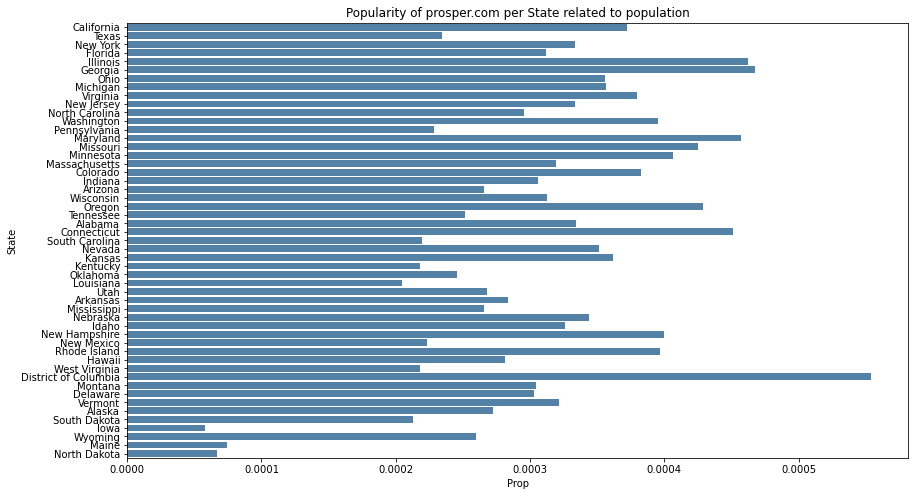

In [6]:
plt.figure(figsize=(14, 8))
g = sb.barplot(x=df_state_counts['Prop'], y=df_state_counts['State'], orient='h', color='steelblue')
plt.title('Popularity of prosper.com per State related to population')

### How does the amount of loan relates to the purpose of the money?
Where does the money go? (Related to the loan amount)?
Most people borrow money for "Debt Consolidation". But splitting the amounts related to the dollars borrowed shows a different picture: In the section with the loan amount of "0 - 5000", it is used for home improvement. In the section "5000 - 10.000" it is used for "Auto". Also "Home Improvement" in the "10.000 to 15.000" range. "Debt consolidation" becomes most prominent in the ranges "15.000 - 20.000", "20.000 - 25.000", "25.000 - 30.000", "30.000 - 35.000" 

In [7]:
#Turn numeric encoded categories into string encoded categories
text = "0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7 - Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans"
needs = {}
for pair in text.split(", "):
    pair_list = pair.split(" - ")
    if len(pair_list) == 2:
        key, value = pair_list
        key = int(key.strip())
        needs[key] = value.strip()
#Function to replace categories
def replace_categories(cat):
    full_cat = needs.get(cat)
    if full_cat:
        return full_cat
    else:
        return cat
    
#Renaming the clumsy name 'ListingCategory (numeric)' into sth. more readable
df_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace = True)

df_clean['ListingCategory'] = df_clean['ListingCategory'].apply(replace_categories)

#Segment the borrower amounts
df_clean['LoanAmountCut'] = pd.cut(df_clean['LoanOriginalAmount'], bins=range(0, df_clean['LoanOriginalAmount'].max()+5000, 5000), include_lowest=False)

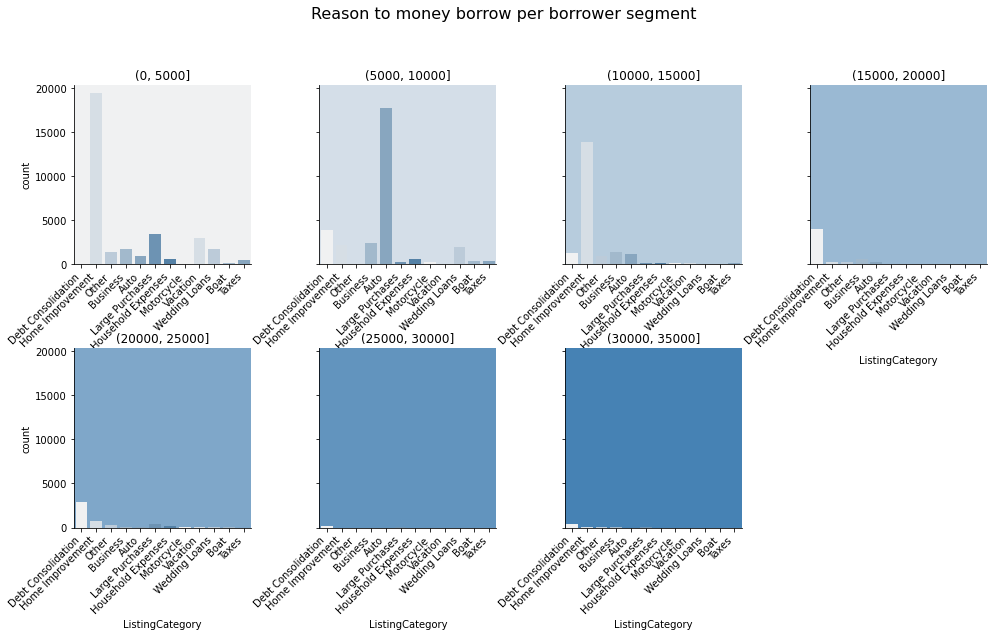

In [8]:
#Facet grid with loan amount
g = sb.FacetGrid(df_clean, col='LoanAmountCut', col_wrap=4, height=2, aspect= 1.5)
base_color = 'steelblue'
#Color the plots according to the borrowed amount
palette = sb.light_palette(base_color, n_colors=len(g.col_names))
g.map(sb.countplot, 'ListingCategory', palette = palette)
#Plot the graphs with titles, tickmarks, bottomlabels
for ax, title, color in zip(g.axes.flat, g.col_names, palette):
    ax.tick_params(axis='x', which='both', labelbottom=True)
    ax.set_title(title)
    ax.set_facecolor(color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
g.fig.suptitle('Reason to money borrow per borrower segment', fontsize=16, y=1.05)
g.fig.set_size_inches(14, 8);
plt.show()

### Relation of occupation and consumeristic lifestyle
I skipped all occupations with a value count below 1000. The remaining ones have reasonable median of debt to income ratio at around 0.3. However, there are outliers. In terms of exploitable potential: People working in Civil Service, Medical Technicians, Police Officers, Attorneys, Military Enlisted and Engineers seem to behave more "responsible" in financial belongings than other people.

In [9]:
#I focus in occupation with value counts above 1000. So I drop those below. 
# Number of occurrences of each occupation
occupation_counts = df_clean['Occupation'].value_counts()
# Occupations with counts less than 1000
low_count_occupations = occupation_counts[occupation_counts < 1000].index.tolist()
#Remove rows where the occupation is in the low count list
df_filtered = df_clean[~df_clean['Occupation'].isin(low_count_occupations)]

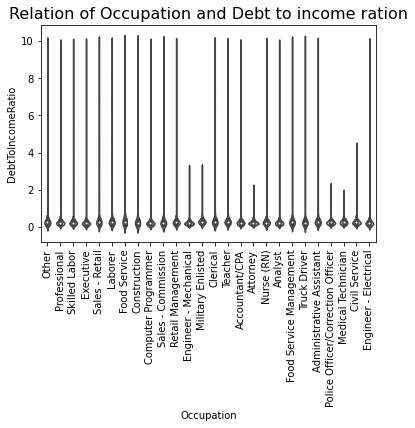

<Figure size 1728x864 with 0 Axes>

In [10]:
sb.violinplot(data=df_filtered, x='Occupation', y='DebtToIncomeRatio')
plt.xticks(rotation=90)
plt.title('Relation of Occupation and Debt to income ration', fontsize=16)
plt.figure(figsize = (24, 12))
plt.show()

### Conclusion
1. prosper.com users are more wealthy than the US average.
2. The reasons to borrow money differ related to the loand original amount category
3. prosper.com users are financially literate. They mostly have a reasonable debt to income ratio

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [11]:
#!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

In [12]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 774898 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
